In [4]:
%matplotlib inline

import os
import pickle
from PIL import Image
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt

from sklearn import decomposition
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split

In [5]:
#setup a standard image size; this will distort some images but will get everything into the same shape
STANDARD_SIZE = (200, 256)
def img_to_matrix(filename, verbose=False):
    """
    takes a filename and turns it into a numpy array of RGB pixels
    """
    img = Image.open(filename)
    if verbose==True:
        print "changing size from %s to %s" % (str(img.size), str(STANDARD_SIZE))
    img = img.resize(STANDARD_SIZE)
    img = list(img.getdata())
    img = map(list, img)
    img = np.array(img)
    return img

def flatten_image(img):
    """
    takes in an (m, n) numpy array and flattens it 
    into an array of shape (1, m * n)
    """
    s = img.shape[0] * img.shape[1]
    img_wide = img.reshape(1, s)
    return img_wide[0]

In [6]:
f = "CONFIDENTIAL_BAINBRIDGE_DATA/Full Attribute Scores/psychology attributes/psychology-attributes.txt"
df = pd.read_csv(f)
img_files_w_scores = df['Filename']

In [7]:
if os.path.isfile("tmp/X.p"):
    print "file found, file loaded"
    X = pickle.load(open('tmp/X.p', 'r'))
else:
    img_dir = "CONFIDENTIAL_BAINBRIDGE_DATA/10k US Adult Faces Database/Face Images/"
    X = []
    for image in img_files_w_scores:
        img = img_to_matrix(img_dir + image)
        img = flatten_image(img)
        X.append(img)
    X = np.array(X)
    pickle.dump(X, open("tmp/X.p", "wb"))

file found, file loaded


In [8]:
pca = decomposition.RandomizedPCA(n_components=100)
X2 = pca.fit_transform(X)
# commented out because fit_transform does both!
# and at this point no need to transform anything else with the fit...
# pca.fit(X)
# X = pca.transform(X)

In [9]:
pca.explained_variance_ratio_.sum()

0.86428680721640339

In [10]:
cols = list(df.columns.values)
cols = cols[2:]
cols = [x for x in cols if not (x.startswith('catch')) | (x.startswith('sub'))]

In [11]:
def train_test(X,y,label="none",standard_axis=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
    
    clf = RidgeCV(np.logspace(-5, 10, 100))
    clf.fit(X_train, y_train)
    y_hat = clf.predict(X_test)
    
    MSE = mean_squared_error(y_test,y_hat)
    R2 = clf.score(X_test,y_test)

    plt.scatter(y_test,y_hat)
    plt.title(label + ", MSE=" + str(np.round(MSE,3)) + ", R^2=" + str(np.round(R2,3)))
    if standard_axis:
        plt.xlim(0, 10)
        plt.ylim(0, 10)
    plt.show()
    return label, MSE, R2

/Users/phil/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


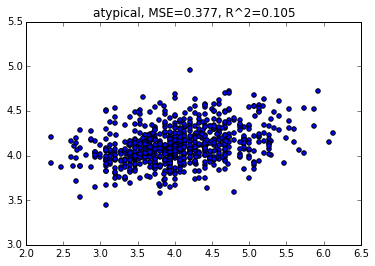

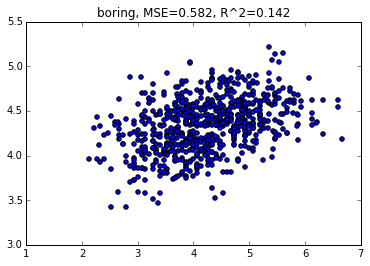

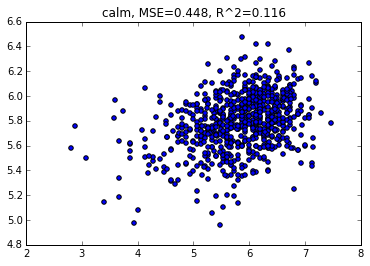

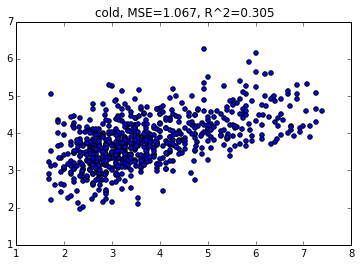

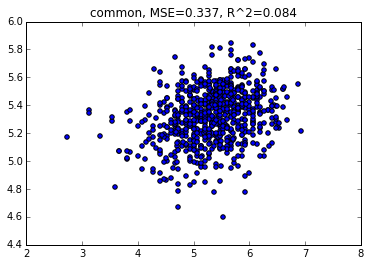

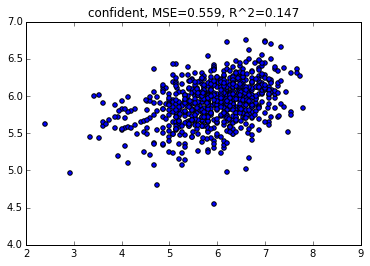

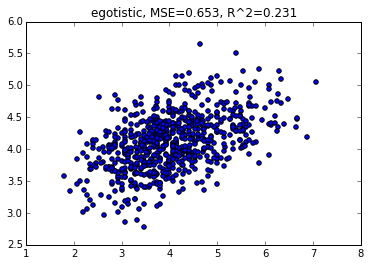

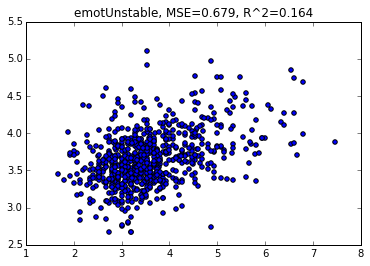

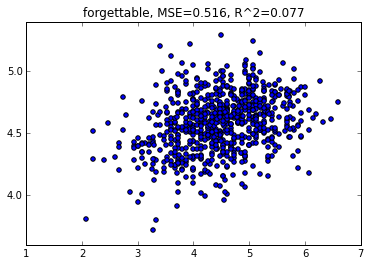

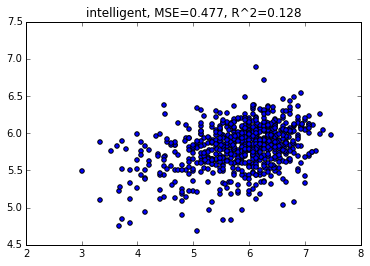

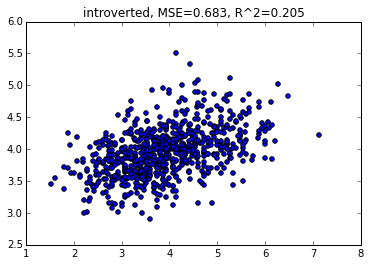

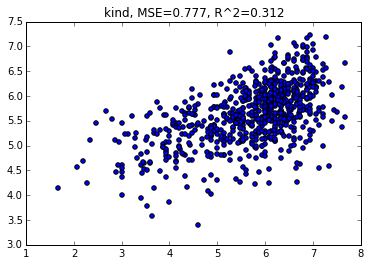

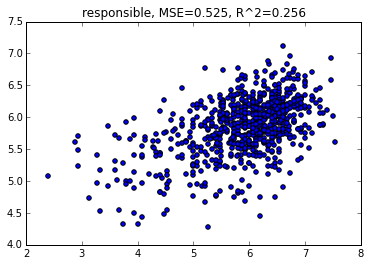

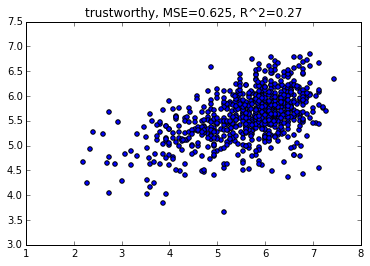

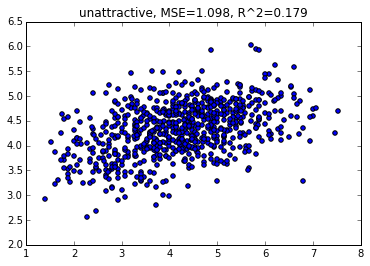

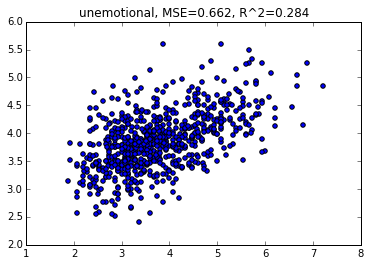

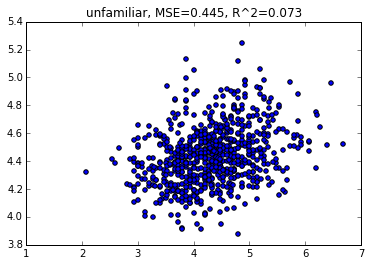

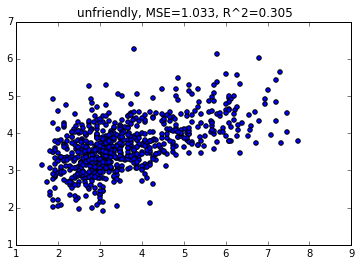

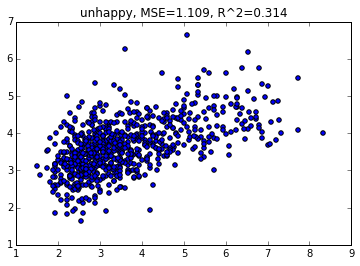

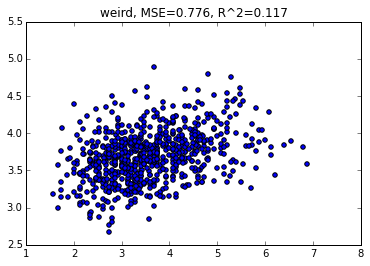

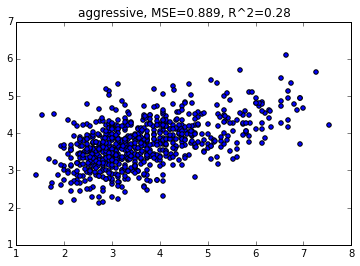

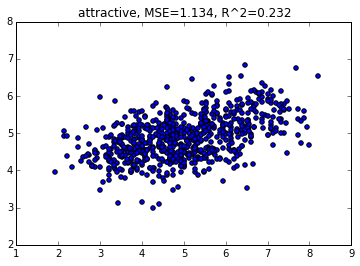

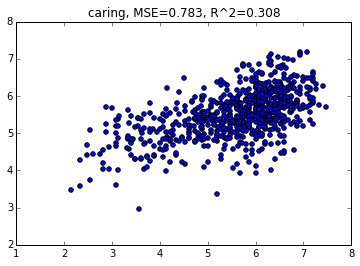

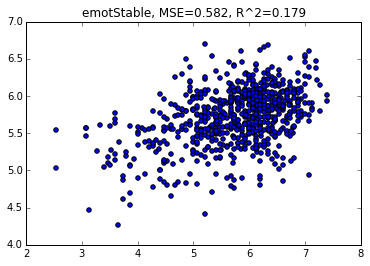

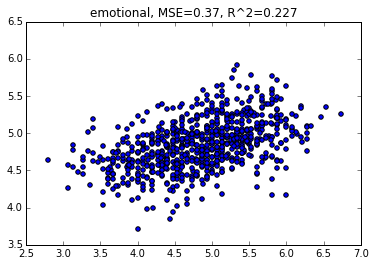

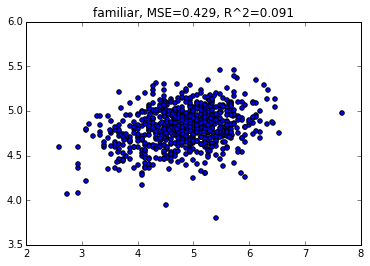

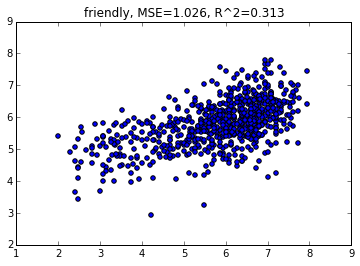

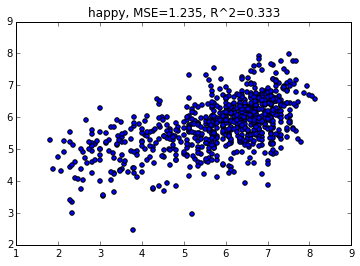

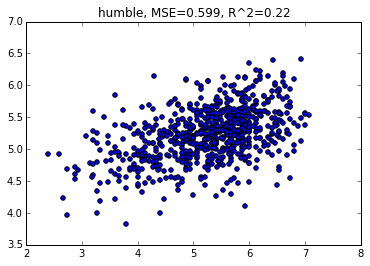

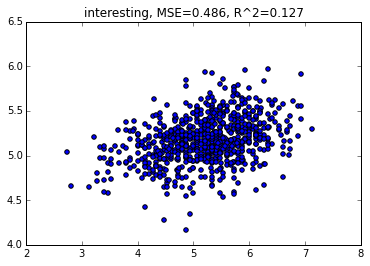

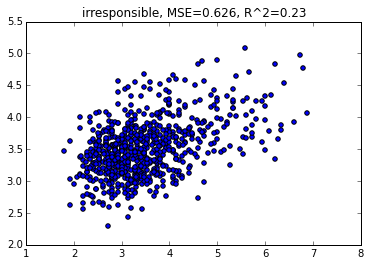

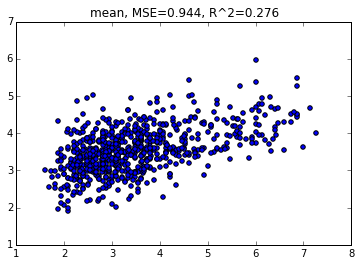

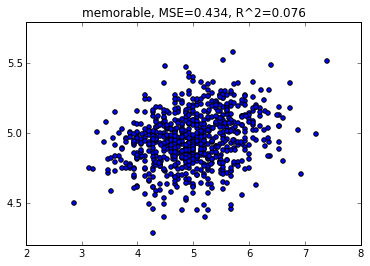

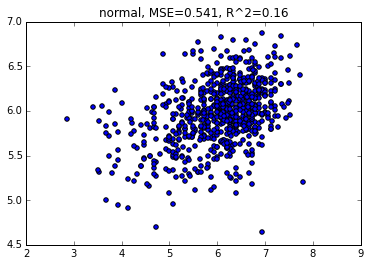

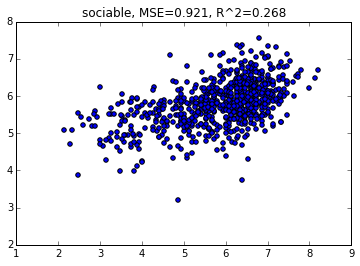

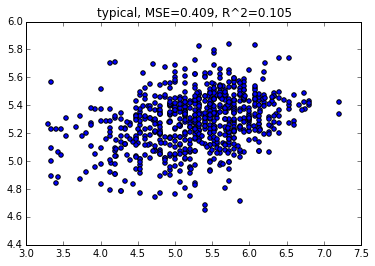

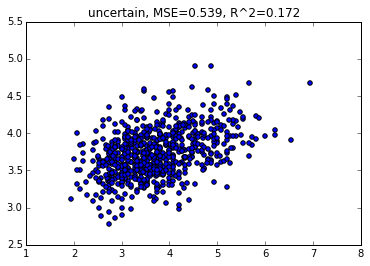

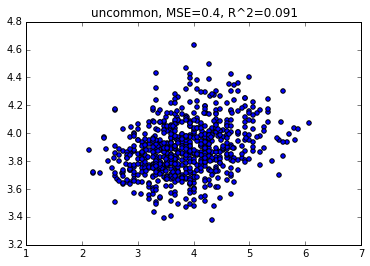

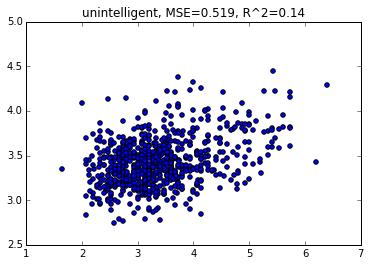

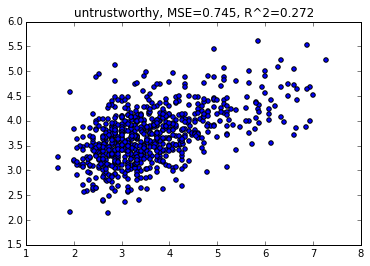

In [12]:
label_MSE_R2 = []
for col in cols:
    label_MSE_R2.append(train_test(X2,df[col].values,col))

In [13]:
for label, MSE, R2 in label_MSE_R2:
    print label, MSE, R2

atypical 0.376940101377 0.10545464959
boring 0.58193719128 0.14193509977
calm 0.447670120246 0.116261736946
cold 1.06680797024 0.305499103542
common 0.336956159554 0.0844016483795
confident 0.5588467519 0.14684722754
egotistic 0.653117916085 0.231389727155
emotUnstable 0.679058260593 0.164207938791
forgettable 0.515754842377 0.0772759446579
intelligent 0.47733001891 0.128135877737
introverted 0.683250975531 0.204720714939
kind 0.777358603806 0.311861992885
responsible 0.524762599195 0.255794189498
trustworthy 0.62455404606 0.269840442167
unattractive 1.0981648562 0.17942353716
unemotional 0.661715734845 0.283938770238
unfamiliar 0.444677041494 0.073314222316
unfriendly 1.0333171271 0.305323726278
unhappy 1.10861683897 0.314466682289
weird 0.776217713103 0.117456313472
aggressive 0.888520959287 0.279744105735
attractive 1.13416159955 0.231568140727
caring 0.782862480144 0.30804227533
emotStable 0.58198063692 0.178928854553
emotional 0.369726662138 0.227425372582
familiar 0.429165309624 